In [104]:
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [36]:
#read link data
link_data = pd.read_csv("transportation_data/wislr-data/wislr_rdwy_link.csv")

In [37]:
link_data.head()

,RDWY_LINK_ID,REF_SITE_FROM_ID,REF_SITE_TO_ID,LCM_FROM_TO_DIS,RDWY_LINK_RSLN
0,4818580,1661200,1660820,4066,52.799999
1,4819008,1661678,1661705,158,52.799999
2,4819009,1661704,1661705,264,52.799999
3,4819014,1661723,1661697,581,52.799999
4,4819015,1661705,1661723,264,52.799999


In [41]:
link_file = link_data[["REF_SITE_FROM_ID","REF_SITE_TO_ID","LCM_FROM_TO_DIS"]]

# there are some duplicate keys
link_file = link_file.drop_duplicates(
  subset = ['REF_SITE_FROM_ID', 'REF_SITE_TO_ID'],
  keep = 'last').reset_index(drop = True)

link_file.to_csv("link_file.csv", index=False, header=False)

In [42]:
!wc -l link_file.csv

    3132 link_file.csv


In [43]:
# change file to gdx
!csv2gdx link_file.csv id=link index=1,2 value=3 colCount=3 

No errors, CSV2GDX time = 18ms


In [44]:
!ls

TOPS DSI Safe Routes - Shared.zip link_file.gdx
Untitled.ipynb                    madison_network.pdf
cache                             madison_network.png
extract_road_data.ipynb           shortest_path
link_file.csv                     transportation_data


,REF_SITE_FROM_ID,REF_SITE_TO_ID,LCM_FROM_TO_DIS
0,1661200,1660820,4066
1,1661678,1661705,158
2,1661704,1661705,264
3,1661723,1661697,581
4,1661705,1661723,264
...,...,...,...
3127,1663210,1663276,1003
3128,1661558,1661551,317
3129,1661551,1661558,317
3130,2016715,2005025,1108


In [33]:
len(link_file)

3161

In [53]:
len(set(link_file['REF_SITE_TO_ID'].tolist() + link_file['REF_SITE_FROM_ID'].tolist()))

1318

In [50]:
len(set(link_file['REF_SITE_FROM_ID']))

1313

In [52]:
link_file['REF_SITE_TO_ID'].tolist()

[1660820,
 1661705,
 1661705,
 1661697,
 1661723,
 1661739,
 1661704,
 1661746,
 1661767,
 1661768,
 1661768,
 1661769,
 1661754,
 1661795,
 1661746,
 1661794,
 1661834,
 1661774,
 1661836,
 1661867,
 1661869,
 1661868,
 1661869,
 1661744,
 1661805,
 1661880,
 1661878,
 1661805,
 1661884,
 1661769,
 1661834,
 1661887,
 1661886,
 1661837,
 1661838,
 1661868,
 1661939,
 1661867,
 1661942,
 1661936,
 1661879,
 1661906,
 1661950,
 1661959,
 1661950,
 1661851,
 1661904,
 1661940,
 1661952,
 1661951,
 1661946,
 1661908,
 1661936,
 1662004,
 1661945,
 1661927,
 1661970,
 1661965,
 1662019,
 1661904,
 1661993,
 1661974,
 1661977,
 1661978,
 1661984,
 1661988,
 1661987,
 1661997,
 1662008,
 1662055,
 1662053,
 1662011,
 1661984,
 1662000,
 1662001,
 1662003,
 1662023,
 1661940,
 1662062,
 1662070,
 1662016,
 1661969,
 1662042,
 1662040,
 1662044,
 1662096,
 1662096,
 1662098,
 1661939,
 1661897,
 1662057,
 1662117,
 1662054,
 1662119,
 1661965,
 1661993,
 1662068,
 1662039,
 1662129,
 1662138,


# read shape file

In [56]:
import shapefile


In [61]:
shape = shapefile.Reader("transportation_data/Middleton_Cross_Plains/Features/Middleton_CrossPlains_OVLY.shp")
# #first feature of the shapefile
# feature = shape.shapeRecords()[0]
# first = feature.shape.__geo_interface__  
# print first # (GeoJSON format)
# {'type': 'LineString', 'coordinates': ((0.0, 0.0), (25.0, 10.0), (50.0, 50.0))}

In [60]:
! ls transportation_data/Middleton_Cross_Plains/Features/Middleton_CrossPlains_OVLY.shp

Crash_data_combined_2017_2020.cpg  Middleton_CrossPlains_OVLY.dbf
Crash_data_combined_2017_2020.dbf  Middleton_CrossPlains_OVLY.prj
Crash_data_combined_2017_2020.prj  Middleton_CrossPlains_OVLY.sbn
Crash_data_combined_2017_2020.sbn  Middleton_CrossPlains_OVLY.sbx
Crash_data_combined_2017_2020.sbx  Middleton_CrossPlains_OVLY.shp
Crash_data_combined_2017_2020.shp  Middleton_CrossPlains_OVLY.shp.xml
Crash_data_combined_2017_2020.shx  Middleton_CrossPlains_OVLY.shx
Middleton_CrossPlains_OVLY.cpg


In [72]:
shape.shapeRecords()[1]

In [64]:
feature = shape.shapeRecords()[0]
first = feature.shape.__geo_interface__

In [65]:
print(first)

{'type': 'LineString', 'coordinates': [(548146.3613, 293559.28800000064), (548168.9230000004, 293555.7009999994), (548244.0439999998, 293544.3379999995)]}


In [95]:
shape.record(3796)

Record #3796: [13696544, 54801840, '70', 30, '2015', 0, 0, 3, 2, 'N', 'A', 50, 0, 1, 1, 2, 2, 10, 0, 0, 0, '', None, 379, 0.03, 5, 0, '', 0, '', 0, 0, '047', 3, 97, 'NON', '000-0', '', 0, 0.0, '', 'Augusta Dr', '', 5371953, 0, 'C', 'MIDDLETON', '255', '2022', '13', 802, 943, datetime.date(2021, 5, 12), 'O', 5371952, 2021, 392, 0, 0.0, '', 0, 0, 0, 0, 0, 0, 379, datetime.date(2016, 3, 17), '2', 'A', 10, datetime.date(2017, 1, 1), 0, '', '', 'N', 97, 'L', '', '', 0, 593432, '', '', 'EX', '70', '', 378, 'Augu2', '', '1', '4', 0, 0, '', '', 41.7563054732]

In [87]:
shape.numRecords

3797

In [97]:
road = []
for i in range(3797):
    road.append(shape.record(i)[43])

In [101]:
len(set(road))

3159

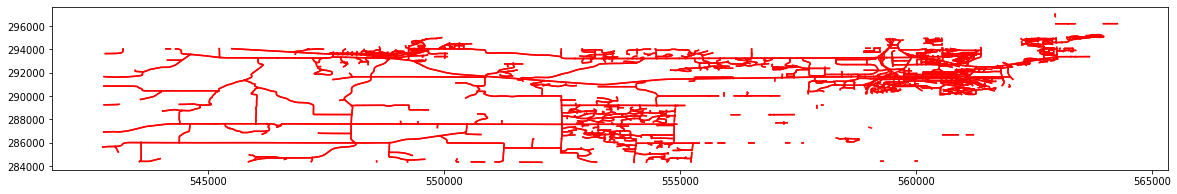

In [112]:

plt.figure()
plt.rcParams["figure.figsize"] = (20,10)
for sp in shape.shapeRecords():
    x = [i[0] for i in sp.shape.points[:]]
    y = [i[1] for i in sp.shape.points[:]]
    plt.plot(x,y,'r')
plt.show()